In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/mushroom-classification/mushrooms.csv


In [4]:
# load required libraries for ANN
# load the required libraries and packages
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense,Dropout
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Read the data 
data = pd.read_csv('../input/mushroom-classification/mushrooms.csv')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [12]:
#seems all are categorical variables and there are no null values in the dataset
y=data['class']
data.drop(['class'],axis = 1,inplace = True)

In [20]:
#perform all the one hot encoding to X variables and label encoding to y variable
le= LabelEncoder()
yy = le.fit_transform(y)
xx = pd.get_dummies(data,drop_first=True)
xx.shape
#yy.shape

(8124, 95)

In [18]:
#split the dataset into train and test 
xtrain,xtest,ytrain,ytest  = train_test_split(xx,yy,test_size = 0.2,random_state = 2)

In [45]:
#building the ANN model
classifier = Sequential()

# Build the input and hidden layers with dropout
classifier.add(Dense(units = 32, activation = 'relu', kernel_initializer = 'uniform', input_dim = 95))
classifier.add(Dropout(rate = 0.1))

# Adding the second hidden layer
classifier.add(Dense(units = 32, activation = 'relu', kernel_initializer = 'uniform'))
classifier.add(Dropout(rate = 0.1))

# Adding the third hidden layer
classifier.add(Dense(units = 32, activation = 'relu', kernel_initializer = 'uniform'))
classifier.add(Dropout(rate = 0.1))

# Adding an output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting ANN to training set
history = classifier.fit(xtrain, ytrain, validation_split = 0.33, batch_size = 10, epochs = 30)

Train on 4354 samples, validate on 2145 samples
Epoch 1/30
4354/4354 [==============================] - 1s 313us/step - loss: 0.1328 - accuracy: 0.9529 - val_loss: 0.0162 - val_accuracy: 0.9967
Epoch 2/30
4354/4354 [==============================] - 1s 272us/step - loss: 0.0090 - accuracy: 0.9972 - val_loss: 0.0093 - val_accuracy: 0.9981
Epoch 3/30
4354/4354 [==============================] - 1s 281us/step - loss: 0.0045 - accuracy: 0.9991 - val_loss: 0.0190 - val_accuracy: 0.9981
Epoch 4/30
4354/4354 [==============================] - 1s 274us/step - loss: 0.0022 - accuracy: 0.9998 - val_loss: 0.0167 - val_accuracy: 0.9981
Epoch 5/30
4354/4354 [==============================] - 1s 229us/step - loss: 0.0031 - accuracy: 0.9998 - val_loss: 0.0030 - val_accuracy: 0.9986
Epoch 6/30
4354/4354 [==============================] - 1s 228us/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.0019 - val_accuracy: 0.9991
Epoch 7/30
4354/4354 [==============================] - 1s 281us/step - loss

/opt/conda/lib/python3.6/site-packages/matplotlib/legend.py:798: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/opt/conda/lib/python3.6/site-packages/matplotlib/legend.py:798: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/opt/conda/lib/python3.6/site-packages/matplotlib/legend.py:798: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/opt/conda/lib/python3.6/site-packages/matp

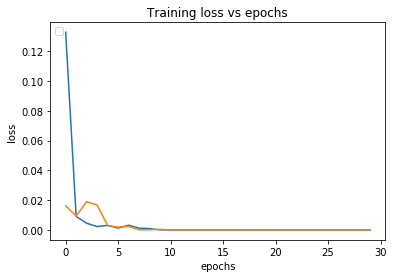

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training loss vs epochs')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend('train','validation',loc = 'upper left')
plt.show()

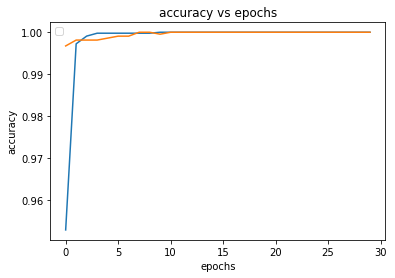

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy vs epochs')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend('train','validation',loc = 'upper left')
plt.show()

In [48]:
#test the testing data set
ypred = classifier.predict(xtest)>0.5

In [50]:
from sklearn import metrics
accu = metrics.accuracy_score(ytest,ypred)
accu
cr = metrics.classification_report(ypred,ytest)
cr